In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('./data/10_Property_stolen_and_recovered.csv')

In [5]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


Observations:
1. There are some categorical variables and some continuous variables in the dataset.
2. We may not need the variable 'Group_Name'
3. We need to clean up the 'Sub_Group_Name'.
4. we may need to scale the Value_of_Property_Recovered and Value_of_Property_Stolen variables.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Area_Name                    2449 non-null   object
 1   Year                         2449 non-null   int64 
 2   Group_Name                   2449 non-null   object
 3   Sub_Group_Name               2449 non-null   object
 4   Cases_Property_Recovered     2449 non-null   int64 
 5   Cases_Property_Stolen        2449 non-null   int64 
 6   Value_of_Property_Recovered  2449 non-null   int64 
 7   Value_of_Property_Stolen     2449 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 153.2+ KB


In [7]:
df.isnull().sum()

Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

Observations:
1. No null values in the dataset.

In [8]:
df.shape

(2449, 8)

In [9]:
df.describe()

,Year,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
count,2449.000000,2449.000000,2449.000000,2.449000e+03,2.449000e+03
mean,2005.499388,1232.892201,3419.420988,5.859924e+07,2.465431e+08
std,2.873294,3079.573907,8136.256820,2.494403e+08,9.670035e+08
min,2001.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2003.000000,13.000000,45.000000,6.845700e+05,3.649018e+06
50%,2005.000000,113.000000,358.000000,5.851830e+06,2.701800e+07
75%,2008.000000,722.000000,1875.000000,3.406395e+07,1.214580e+08
max,2010.000000,27960.000000,80663.000000,7.470011e+09,2.377625e+10


In [10]:
df[['Area_Name', 'Group_Name', 'Sub_Group_Name']].describe()

,Area_Name,Group_Name,Sub_Group_Name
count,2449,2449,2449
unique,35,7,7
top,Gujarat,Theft - Property,3. Burglary
freq,70,350,350


In [11]:
35*7*10 #Area names, Sub groups, years

2450

Observations:
1. The 1st thing I notice is the high max values in all the variables. Need to investigate this.
2. The Year variable shows that there data from 2001 to 2010.

In [15]:
print("Unique values :\n")
for col in ['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name']:
    print(f'In {col}: {df[col].unique()}\n')

Unique values :

In Area_Name: ['Andaman & Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu'
 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']

In Year: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010]

In Group_Name: ['Burglary - Property' 'Criminal Breach of Trust - Property'
 'Dacoity -Property' 'Other heads of Property' 'Robbery - Property'
 'Theft - Property' 'Total Property']

In Sub_Group_Name: ['3. Burglary' '5. Criminal Breach of Trust' '1. Dacoity'
 '6. Other Property' '2. Robbery' '4. Theft'
 '7. Total Property Stolen & Recovered']



Observations:
1. Both the Group_Name and Sub_Group_Name variables contain the same group names with very little difference. We can drop one and clean the other. I'll investigate to check if both variables have the same values in all places.

In [16]:
df.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

In [17]:
print("Value Counts :\n")
for col in ['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name']:
    print(f'In {col}: {df[col].value_counts()}\n')

Value Counts :

In Area_Name: Gujarat                      70
Himachal Pradesh             70
Puducherry                   70
Mizoram                      70
Delhi                        70
Uttar Pradesh                70
Karnataka                    70
Dadra & Nagar Haveli         70
Tripura                      70
Haryana                      70
Meghalaya                    70
Jammu & Kashmir              70
Maharashtra                  70
Chandigarh                   70
Bihar                        70
Assam                        70
Daman & Diu                  70
Rajasthan                    70
Sikkim                       70
Uttarakhand                  70
Punjab                       70
Chhattisgarh                 70
Goa                          70
Tamil Nadu                   70
West Bengal                  70
Jharkhand                    70
Kerala                       70
Manipur                      70
Andhra Pradesh               70
Madhya Pradesh               70
Odisha    

Observations:
1. A data is missing for Lakshadweep.
2. A data is missing for the year 2007.
3. A data is missing in the Total Property group.
4. Investigate if all these are the same data.

In [18]:
#Investigating Lakshadweep
for val in df['Sub_Group_Name'].unique():
    print(f"For {val}")
    print(df[(df['Area_Name']=='Lakshadweep') & (df['Sub_Group_Name']==val)]['Year'].nunique())

For 3. Burglary
10
For 5. Criminal Breach of Trust
10
For 1. Dacoity
10
For 6. Other Property
10
For 2. Robbery
10
For 4. Theft
10
For 7. Total Property Stolen & Recovered
9


In [19]:
df[(df['Area_Name']=='Lakshadweep') & (df['Sub_Group_Name']=='7. Total Property Stolen & Recovered')]['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2008, 2009, 2010], dtype=int64)

A data for Lakshadweep is missing in 'Total Property Stolen & Recovered' group.

A row for the year 2007 is missing for Lakshadweep for Total Property Stolen & Recovered

In [20]:
df[(df['Area_Name'] == 'Lakshadweep') & (df['Group_Name'].isin(['Total Property']))]

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
2118,Lakshadweep,2001,Total Property,7. Total Property Stolen & Recovered,5,12,35400,109290
2153,Lakshadweep,2002,Total Property,7. Total Property Stolen & Recovered,7,21,85295,209735
2188,Lakshadweep,2003,Total Property,7. Total Property Stolen & Recovered,3,14,96650,178650
2223,Lakshadweep,2004,Total Property,7. Total Property Stolen & Recovered,3,7,3410,7770
2258,Lakshadweep,2005,Total Property,7. Total Property Stolen & Recovered,2,9,9410,261658
2293,Lakshadweep,2006,Total Property,7. Total Property Stolen & Recovered,12,19,111200,376300
2362,Lakshadweep,2008,Total Property,7. Total Property Stolen & Recovered,3,11,99000,244000
2397,Lakshadweep,2009,Total Property,7. Total Property Stolen & Recovered,11,58,300000,3077000
2432,Lakshadweep,2010,Total Property,7. Total Property Stolen & Recovered,3,7,22000,43000


Imputing the missing values.

In [21]:
grp = df[(df['Area_Name'] == 'Lakshadweep') & (~df['Group_Name'].isin(['Total Property']))].groupby(by='Year').sum()

In [22]:
grp

,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
Year,,,,
2001,5,12,35400,109290
2002,7,21,85295,209735
2003,3,14,96650,178650
2004,3,7,3410,7770
2005,2,9,9410,261658
2006,12,19,111200,376300
2007,3,26,66597,848323
2008,3,11,99000,244000
2009,11,58,300000,3077000


In [23]:
grp['Area_Name'] = 'Lakshadweep'
grp['Year'] = grp.index
grp['Group_Name']= 'Total Property'
grp['Sub_Group_Name'] = '7. Total Property Stolen & Recovered'
grp=grp[grp['Year']==2007]
grp

,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,Area_Name,Year,Group_Name,Sub_Group_Name
Year,,,,,,,,
2007,3,26,66597,848323,Lakshadweep,2007,Total Property,7. Total Property Stolen & Recovered


In [24]:
df=df.append(grp, ignore_index=True)

In [26]:
df[(df['Area_Name'] == 'Lakshadweep') & (df['Group_Name'].isin(['Total Property']))]

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
2118,Lakshadweep,2001,Total Property,7. Total Property Stolen & Recovered,5,12,35400,109290
2153,Lakshadweep,2002,Total Property,7. Total Property Stolen & Recovered,7,21,85295,209735
2188,Lakshadweep,2003,Total Property,7. Total Property Stolen & Recovered,3,14,96650,178650
2223,Lakshadweep,2004,Total Property,7. Total Property Stolen & Recovered,3,7,3410,7770
2258,Lakshadweep,2005,Total Property,7. Total Property Stolen & Recovered,2,9,9410,261658
2293,Lakshadweep,2006,Total Property,7. Total Property Stolen & Recovered,12,19,111200,376300
2362,Lakshadweep,2008,Total Property,7. Total Property Stolen & Recovered,3,11,99000,244000
2397,Lakshadweep,2009,Total Property,7. Total Property Stolen & Recovered,11,58,300000,3077000
2432,Lakshadweep,2010,Total Property,7. Total Property Stolen & Recovered,3,7,22000,43000
2449,Lakshadweep,2007,Total Property,7. Total Property Stolen & Recovered,3,26,66597,848323


### Data Cleaning

I am going to keep the Group_Name as is and tweek the Sub_Group_Name so that it shows 2 letters to represent each group.


In [27]:
df['Sub_Group_Name'] = df['Sub_Group_Name'].apply(lambda x: x.split(' ')[1].strip()[:2])
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,Bu,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,Bu,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,Bu,66,248,825115,4931904
3,Assam,2001,Burglary - Property,Bu,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,Bu,367,3231,2327135,17023937


In [28]:
df['Sub_Group_Name'].value_counts()

Ot    350
Da    350
Th    350
Ro    350
Cr    350
Bu    350
To    350
Name: Sub_Group_Name, dtype: int64

Check if the values in Group and Sub group are the same

In [30]:
np.where(df['Group_Name'].str[:2] != df['Sub_Group_Name'])

(array([], dtype=int64),)

There are no rows in the dataset where the Group and Subgroup values are different.

In [94]:
data_no_total = df[~df['Sub_Group_Name'].isin(['To'])]

In [95]:
data_total = df[df['Sub_Group_Name'].isin(['To'])]

### Data Visualisation

Total group

In [172]:
data_total.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
2100,Andaman & Nicobar Islands,2001,Total Property,To,54,143,1192179,3184477
2101,Andhra Pradesh,2001,Total Property,To,13418,25070,186103403,476038316
2102,Arunachal Pradesh,2001,Total Property,To,300,858,9652850,58483056
2103,Assam,2001,Total Property,To,2149,9778,24989343,121602215
2104,Bihar,2001,Total Property,To,3357,18503,47713186,422706220


In [173]:
data_total.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

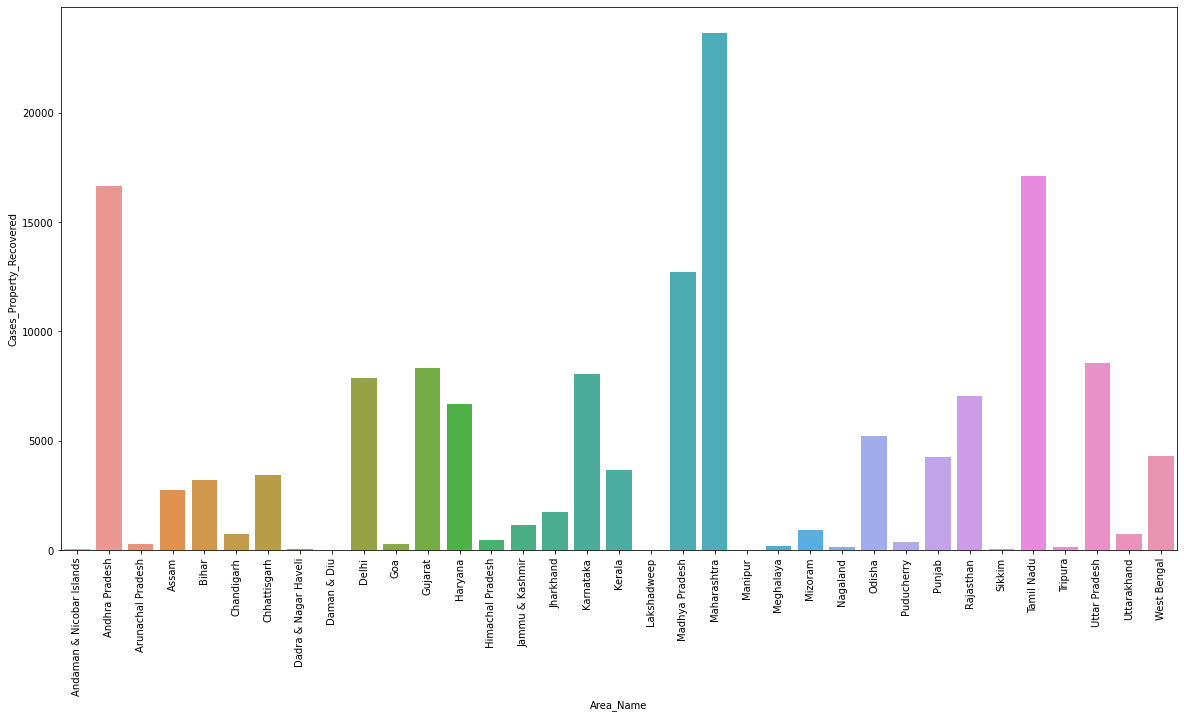

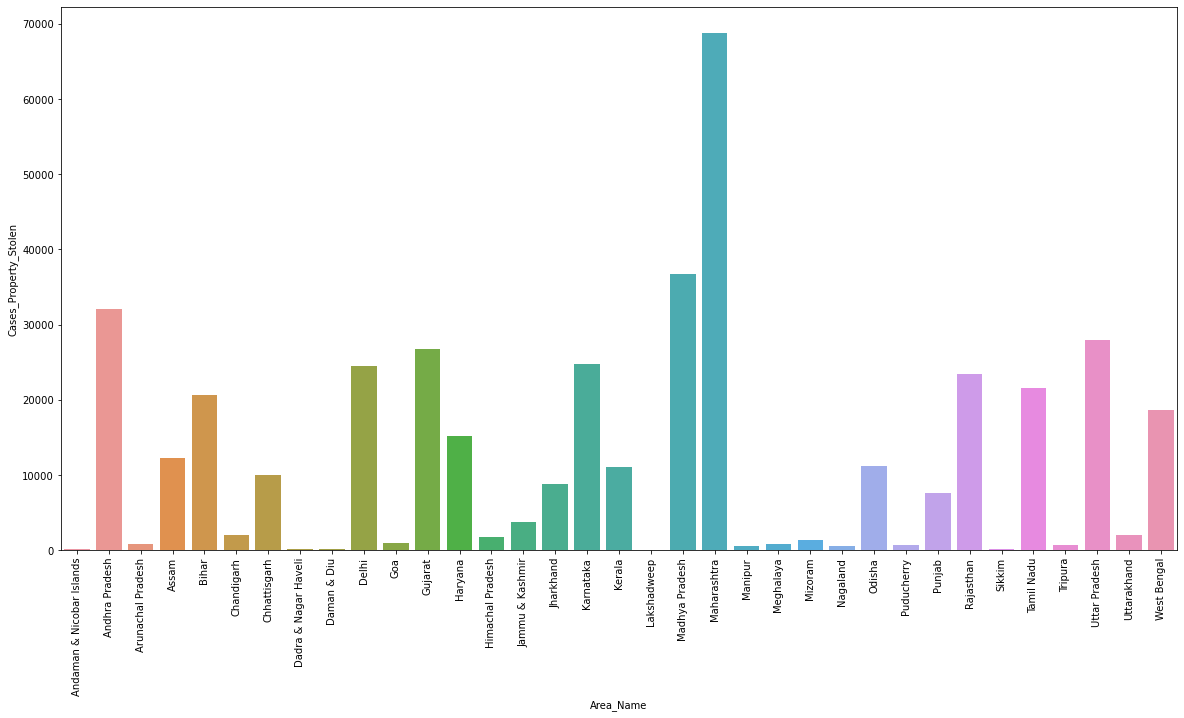

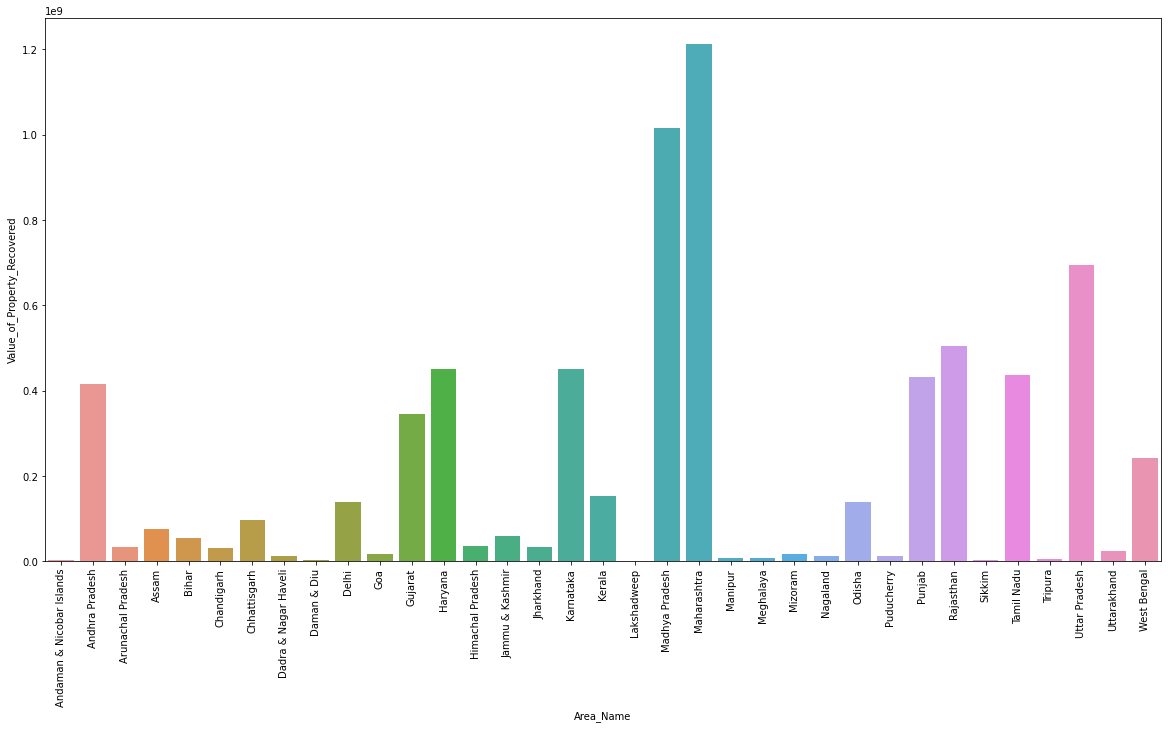

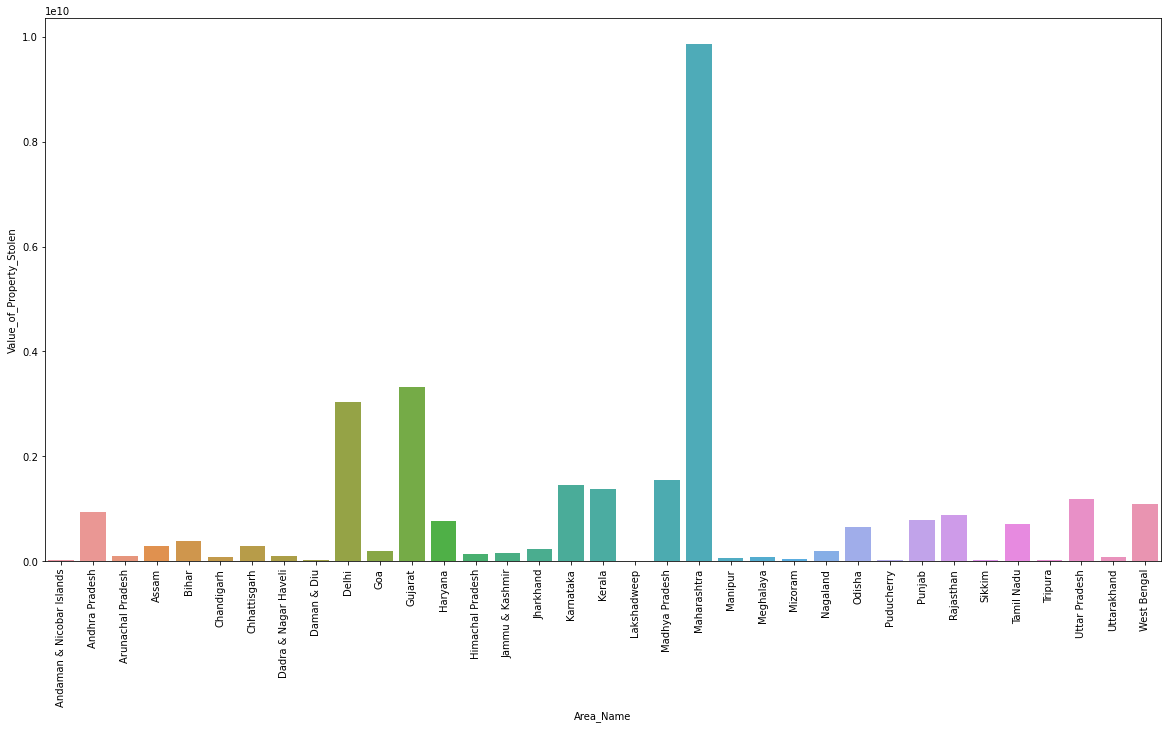

In [182]:
for col in ['Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen']:
    plt.figure(figsize=(20,10))
    g=sns.barplot(x=data_total['Area_Name'], y = data_total[col],ci=None)
    g.set_xticklabels(g.get_xticklabels(),rotation = 90)
    plt.show()


Observations:
1. Maharashtra has to top most number of Stolen properties recovered followed by Tamil Nadu and Andra Pradesh.
2. The least number of Stolen properties recovered are in Manipur and Daman & Diu
3. Most Stolen properties cases are registered in Maharashtra followed by Madhya Pradesh and Andra Predesh. And the least number of cases are registered in Lakshadweep and Daman & Diu.
4. Most of the properties stolen in Maharashtra are costly.

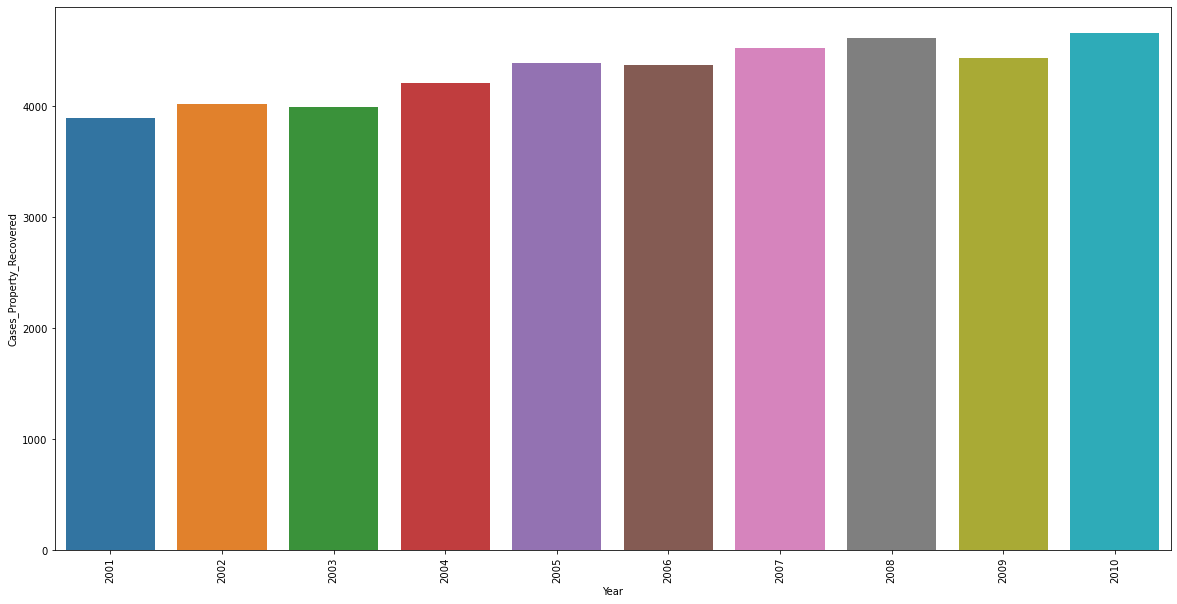

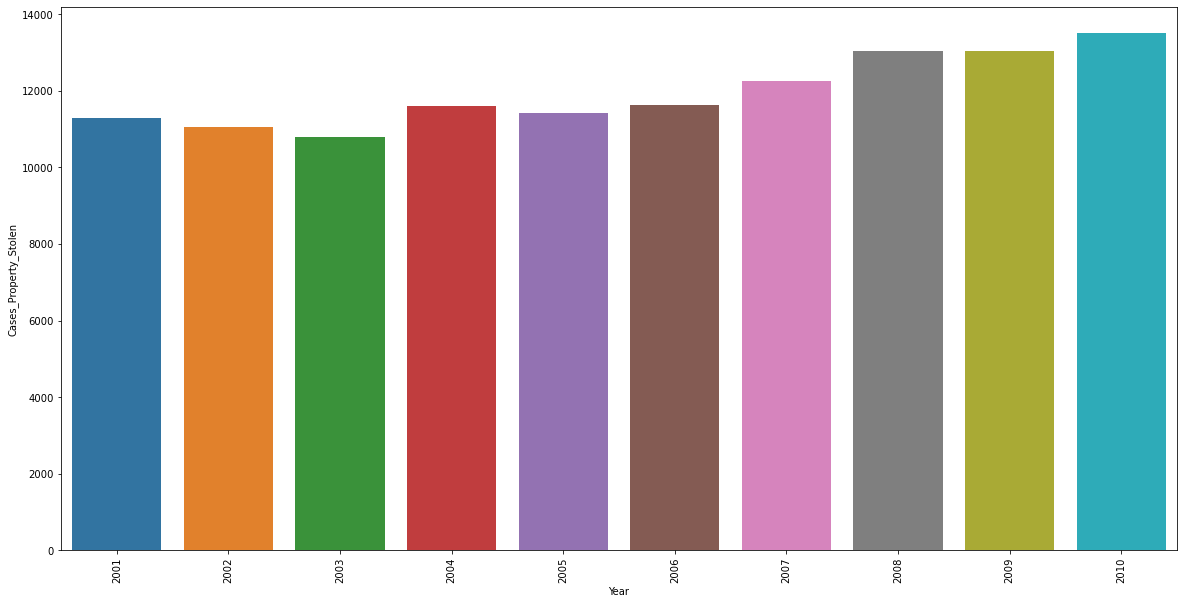

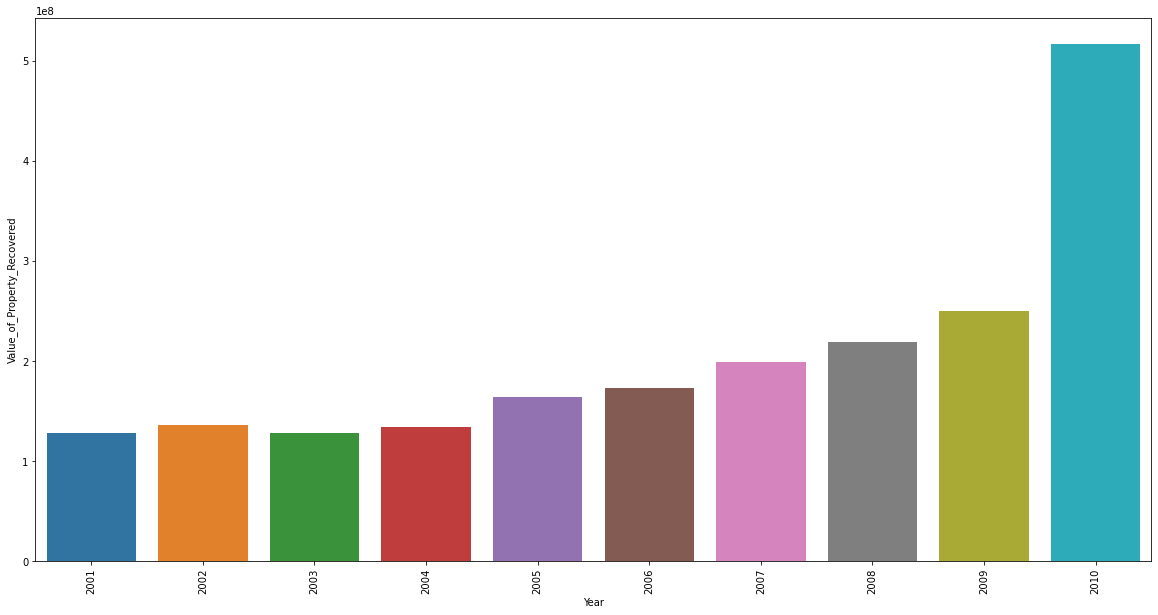

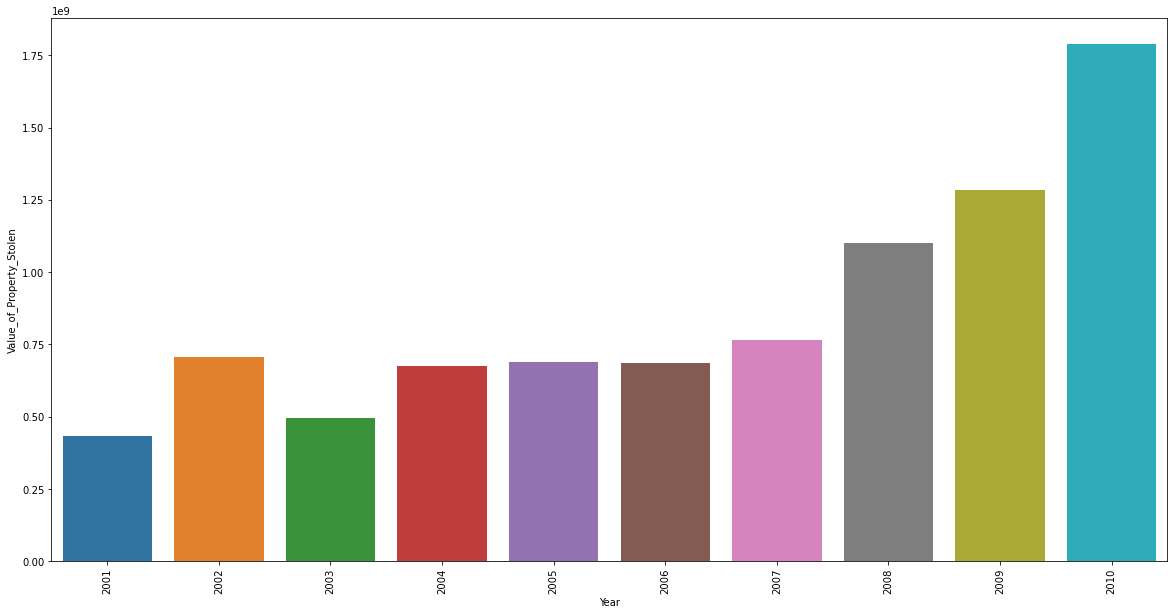

In [176]:
for col in ['Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen']:
    plt.figure(figsize=(20,10))
    g=sns.barplot(x=data_total['Year'], y = data_total[col],ci=None)
    g.set_xticklabels(g.get_xticklabels(),rotation = 90)
    plt.show()

Observations:
1. Most number of properties are stolen and recovered in 2010.
2. We can also see that the value of the properties being stolen have increased over time. We dont know if its the same kind of properties being stolen of if costliers items are being focused in the later years by the thiefs.

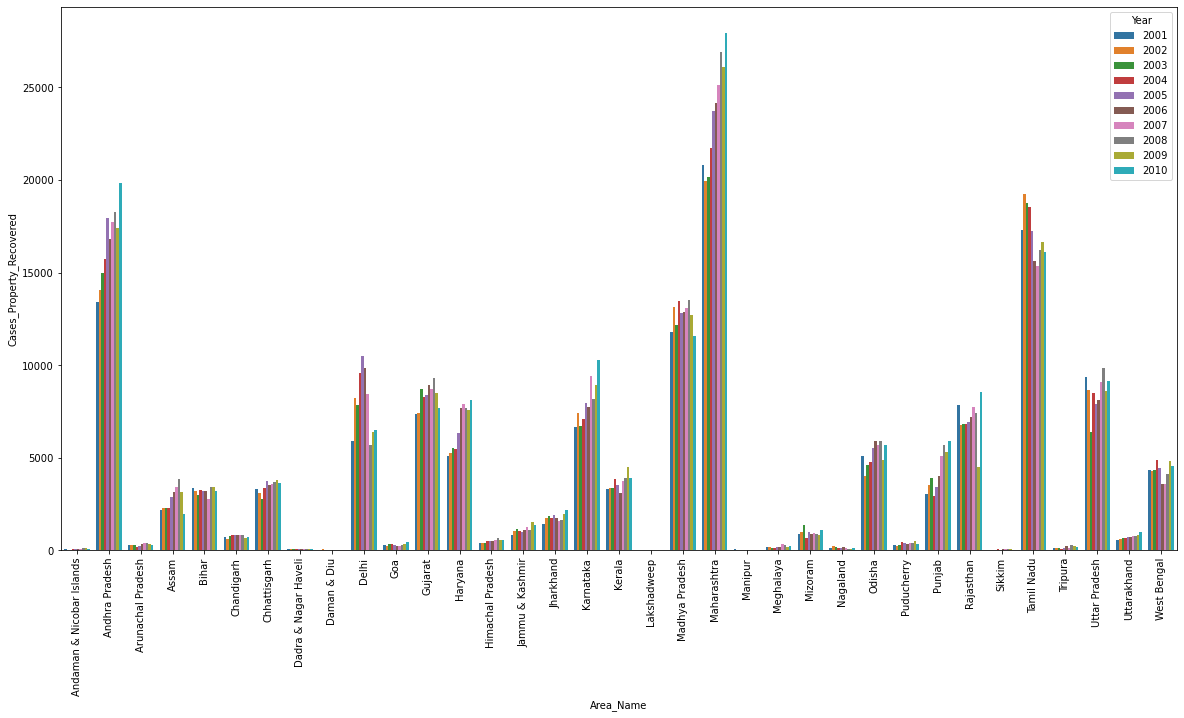

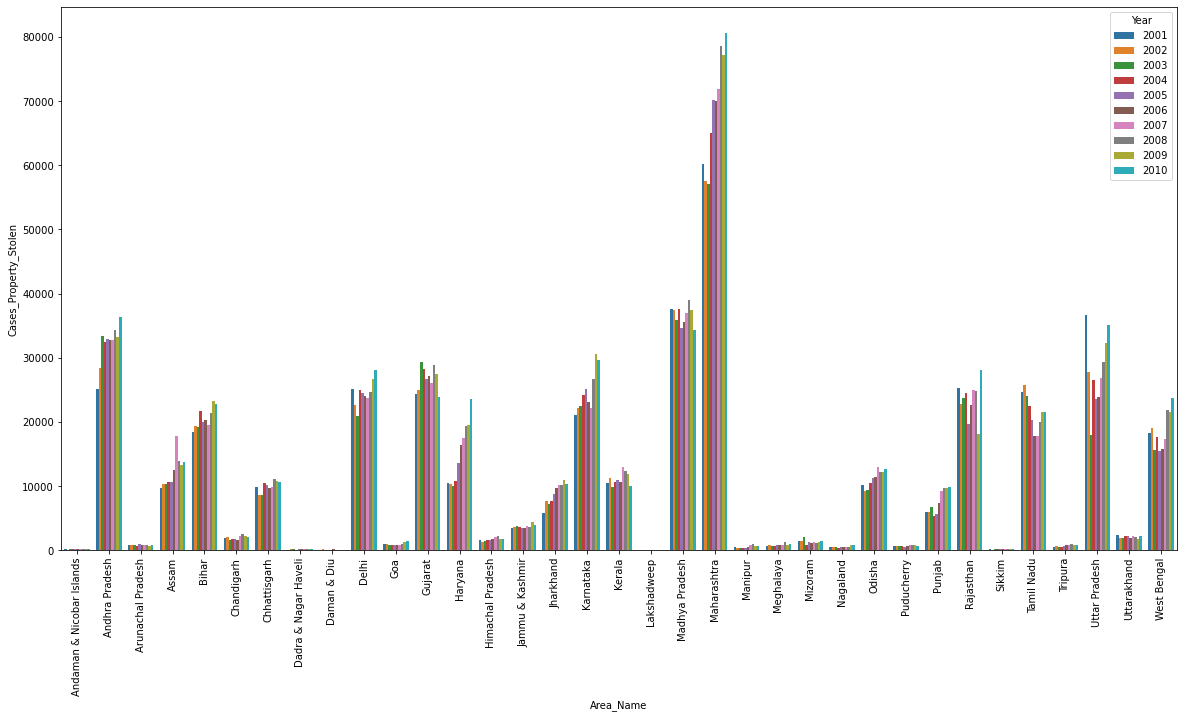

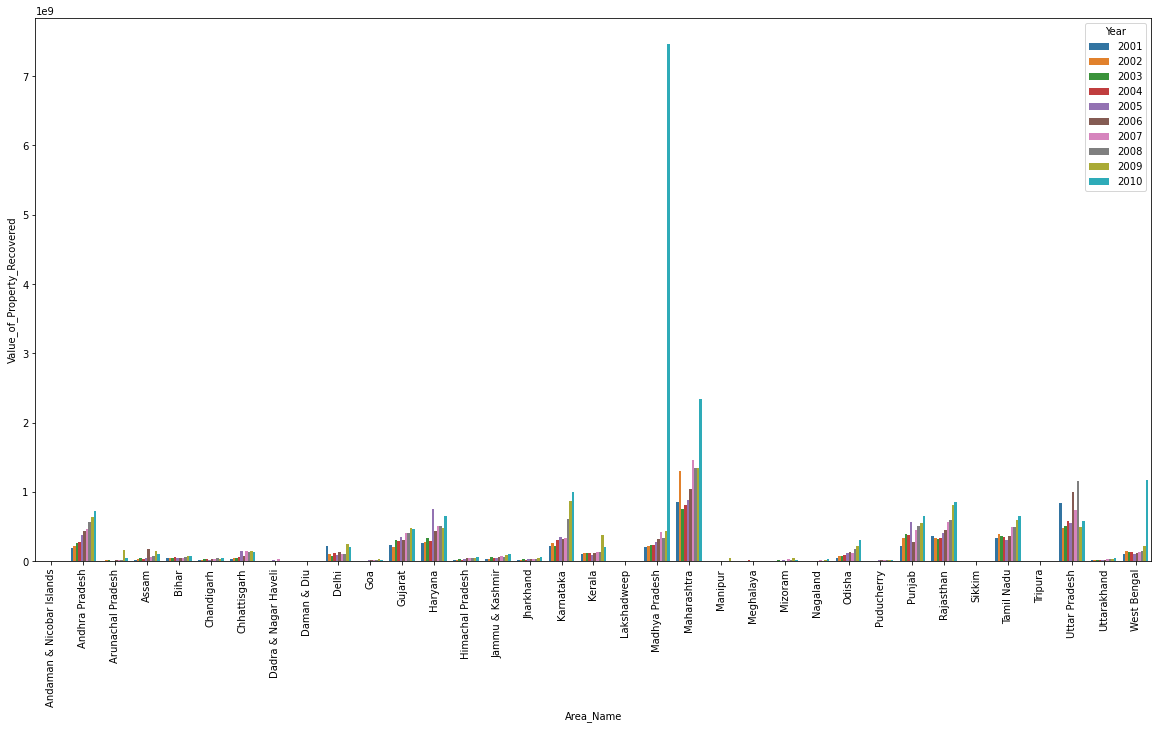

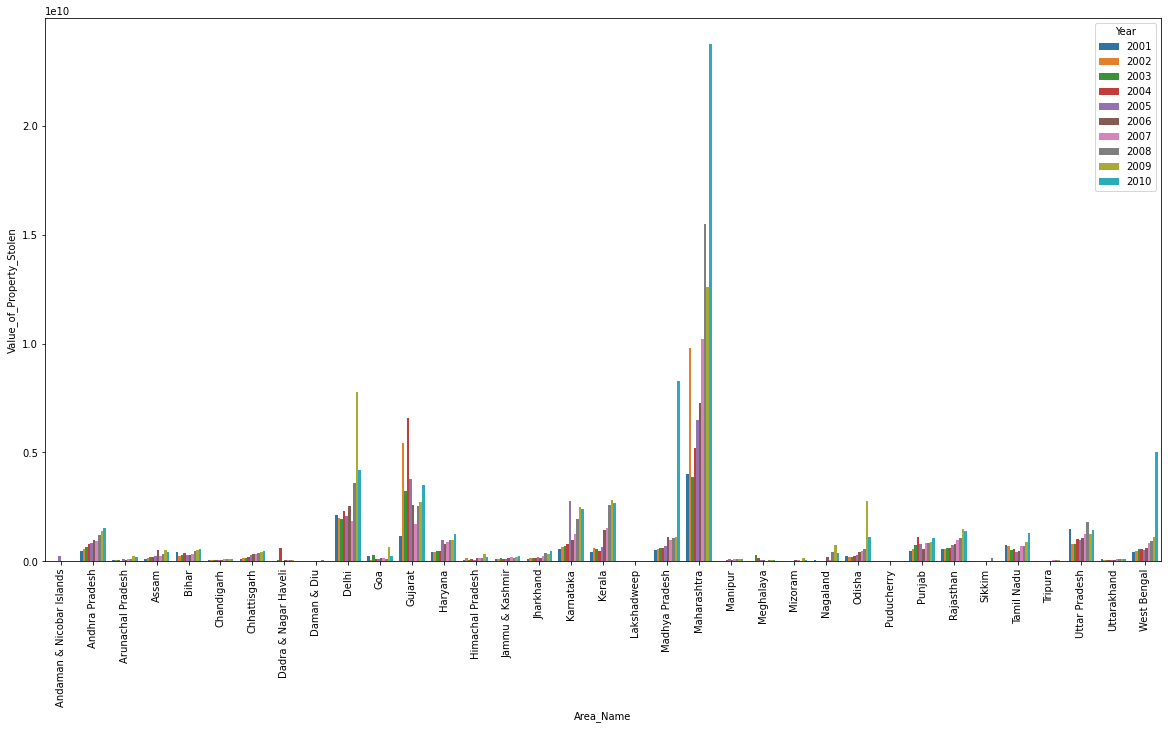

In [183]:
for col in ['Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen']:
    plt.figure(figsize=(20,10))
    g=sns.barplot(x=data_total['Area_Name'], y = data_total[col],ci=None, hue=data_total['Year'])
    g.set_xticklabels(g.get_xticklabels(),rotation = 90)
    plt.show()

Observations:
1. In most states, the recovery has increased in later years especially in 2010. But in states like Assam,Delhi, Gujarat, Tamil Nadu, the Recovery has reduced in the later years.
2. The Stolen property cases have increased in 2010 in few states like Andra, Delhi, Goa, Haryana, Maharashtra, Rajasthan etc.
3. There is a drastic increase in property values in West Bengal, Madhya Pradesh and Maharashtra in 2010.

In [207]:
data_total['Recovered_pc'] = data_total['Cases_Property_Recovered']/data_total['Cases_Property_Stolen']
pcts=data_total.groupby('Area_Name').mean()['Recovered_pc'].values

X:\AnacondaEnvironment\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [234]:
data_total.groupby('Area_Name').mean()

,Year,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,Recovered_pc
Area_Name,,,,,,
Andaman & Nicobar Islands,2005.5,75.8,183.1,2.681460e+06,3.233734e+07,0.408015
Andhra Pradesh,2005.5,16625.5,32141.1,4.160486e+08,9.381417e+08,0.517091
Arunachal Pradesh,2005.5,302.4,831.6,3.233771e+07,9.479427e+07,0.363830
Assam,2005.5,2739.2,12278.0,7.605038e+07,2.907416e+08,0.224915
Bihar,2005.5,3193.8,20592.0,5.493924e+07,3.774581e+08,0.155677
Chandigarh,2005.5,759.4,1986.0,3.127743e+07,8.374970e+07,0.391898
Chhattisgarh,2005.5,3445.6,9985.6,9.662142e+07,2.885063e+08,0.345121
Dadra & Nagar Haveli,2005.5,58.5,132.1,1.125721e+07,1.003528e+08,0.444002
Daman & Diu,2005.5,26.7,102.8,4.076767e+06,1.876271e+07,0.263180


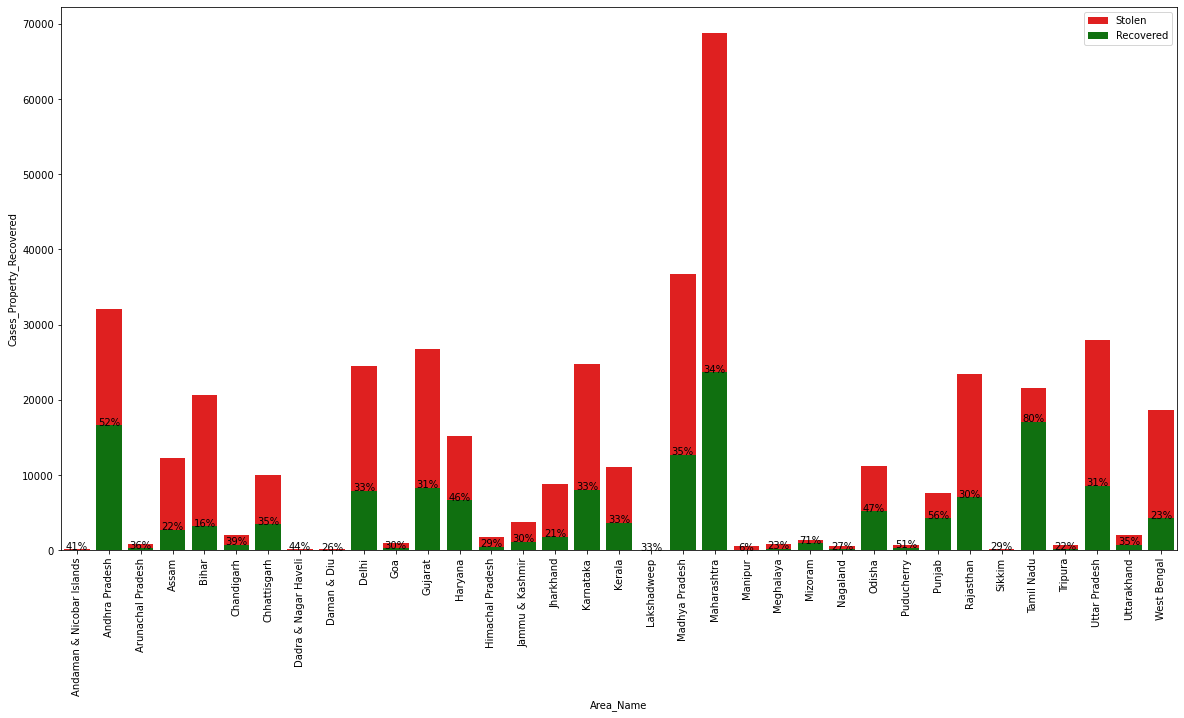

In [238]:
plt.figure(figsize=(20,10))
sns.barplot(x=data_total['Area_Name'], y = data_total['Cases_Property_Stolen'],color='r', ci=None)
ax2=sns.barplot(x=data_total['Area_Name'], y = data_total['Cases_Property_Recovered'],color='g', ci=None)
i=-1    
flag=False
for p in ax2.patches:
    i+=1
    if i == 35:
        i = 0
        flag=True
    if flag:    
        height = p.get_height()
        ax2.text(p.get_x()+p.get_width()/2.,
                height+3,
                '{:1.0f}%'.format(pcts[i]*100),
                ha="center")

    
plt.xticks(rotation = 90)
plt.legend(['Stolen', 'Recovered'])
plt.show()


Observations:
1. The percentage of recovery of lost properties is the highest in Tamil Nadu approximately 80% of the stolen properties are recovered. Followed by Mizoram(71%) and Andra Pradesh(52&)
2. The lowest percentage of recovery is in Manipur with 6%

In [239]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [240]:
d_total=sc.fit_transform(data_total[['Cases_Property_Recovered', 'Cases_Property_Stolen',
                               'Value_of_Property_Recovered', 'Value_of_Property_Stolen']])
d_total=pd.DataFrame(data=d_total, columns=['Cases_Property_Recovered', 'Cases_Property_Stolen',
                               'Value_of_Property_Recovered', 'Value_of_Property_Stolen'])

d_total.head()

,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,-0.746333,-0.797651,-0.421113,-0.409197
1,1.595329,0.884484,-0.039070,-0.184042
2,-0.703228,-0.749401,-0.403633,-0.382866
3,-0.379244,-0.147458,-0.371946,-0.352811
4,-0.167576,0.441327,-0.324997,-0.209437


In [241]:
d_total['Area_Name'] = data_total['Area_Name'].values

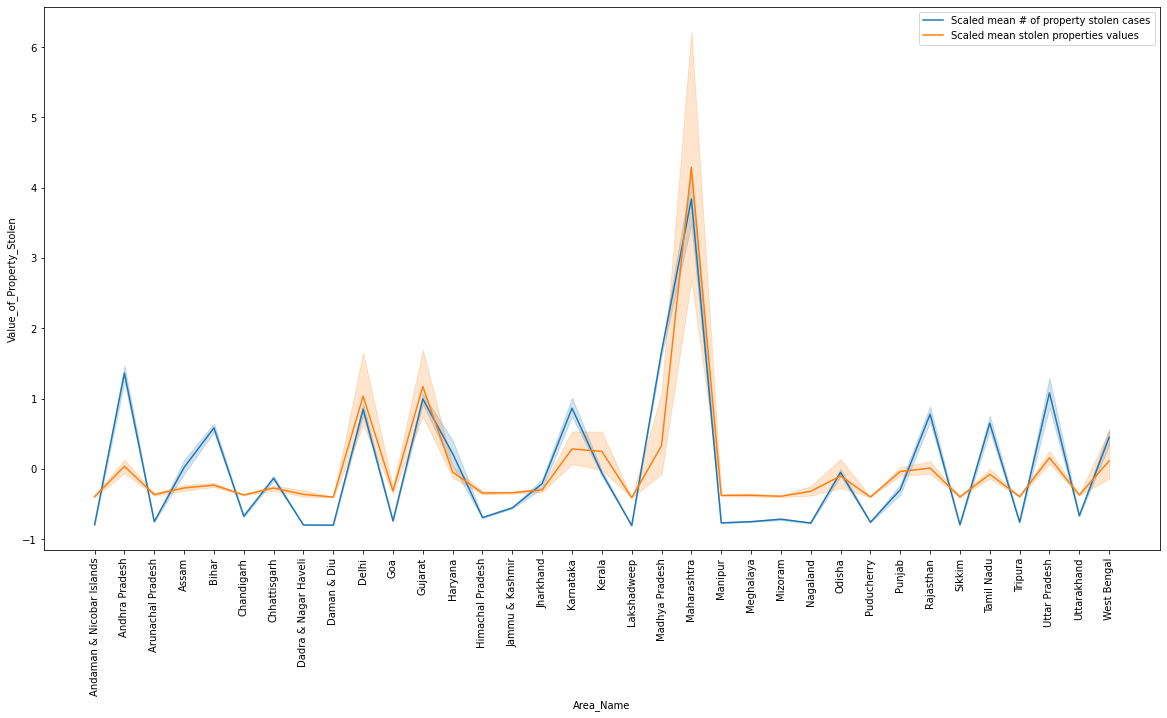

In [242]:
plt.figure(figsize=(20,10))
sns.lineplot(data=d_total ,x='Area_Name', y = 'Cases_Property_Stolen', estimator='mean')
sns.lineplot(data=d_total ,x='Area_Name', y = 'Value_of_Property_Stolen', estimator='mean')
plt.legend(['Scaled mean # of property stolen cases', 'Scaled mean stolen properties values'])
plt.xticks(rotation=90)
plt.show()

Observations:
1. For few states the scaled mean number of stolen properties are higher than the scaled mean stolen property values. For example in Andhra Pradesh, Tamil Nadu, Uttar Pradesh. It might be because most of the properties that were stolen were cheaper items.
2. For few states the scaled mean number of stolen properties are lower than the scaled mean stolen property values. For example in Dadra & Nagar Haveli, Daman & Diu, Goa, Himachal Pradesh,etc. It might be because most of the poperties stolen were costly items.

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot()